# Experiments - Pilot Kafka Perfomance

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

## Latency  Experiments  

### #1 Experiment - End-to-end  Latency 
How long does it take a message we send to be delivered to the consumer?  <br>
For this test, we will create producer and consumer and repeatedly time how long it takes for a producer to send a message to the kafka cluster and then be received by our consumer 
#### Experimental setup:
System: wrangler <br>
Nodes: 1 <br>
Brokers : 1  <br>
Kafka producers : 1 <br>
Kafa consumers: 1 <br>
Partitions: 1 <br>
window interval : Varying <br>



In [136]:
latency = pd.read_csv('../latency/kafka-latency.csv', skipinitialspace=True) 
cols = ['window','latency']
latency = latency[cols].groupby(['window'])
a = latency.mean()
a

,latency
window,
1.0,0.584834
10.0,0.609040
100.0,0.560743
1000.0,0.552467
10000.0,0.477026
100000.0,0.438834


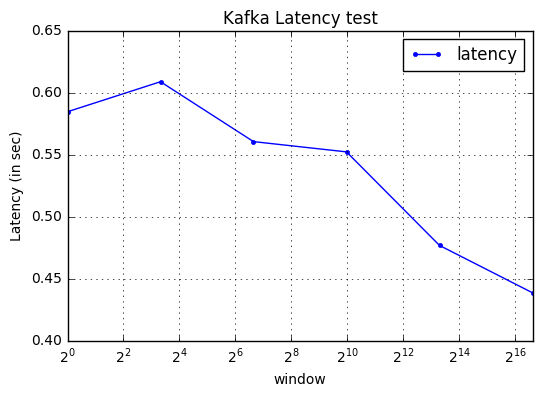

In [153]:
ax = a.plot( y=['latency'], #x=['Message_Size_in_Bytes'], 
                      title='Kafka Latency test', 
                      #legend=None,
                      marker='.',
                      #yerr= latency.std(),
                        
                      )
ax.set_xscale('log', basex=2)
#ax.set_yscale('log',basey=2)
#ax.set_xlabel("Message Size in Bytes")
ax.set_ylabel("Latency (in sec)")
ax.grid()
plt.show()

The latency is increased when the producing message rate is increased. Kafka exposes a message to a consumer after it has been committed. 

### #2 Experiment - Latency vs Number of Partitions 

How does the number of partitions effect the latency of the system?  By default, a Kafka broker only uses a single thread to replicate data from another broker, for all partitions that share replicas between the two brokers. 
**Kafka only exposes a message to a consumer after it has been committed when the message is replicated to all the in-sync replicas**
For this test we create a producer and a  consumer and we vary the number of partitions of the system
#### Experimental setup:
System: wrangler <br>
Nodes: 1 <br>
Brokers : 1  <br>
Kafka producers : 1 <br>
Kafa consumers: 1 <br>
Partitions: Vary <br>

## Producer/Consumer Experiments - Throughput

### #3 Experiment - Effect of Message Size
How does the message size effect the throughput of the system? 
In this experiment we will create one producer and  time how long it takes to produce the same volume  of messages (in MB) by varying the size of each message.

#### Experimental setup:
System: wrangler <br>
Nodes: 1 <br>
Brokers : 1  <br>
Kafka producers : 1 <br>
Partitions: 1 <br>
Message Size : Vary <br>
Total Messages Size: Vary <br>

In [109]:
data_89 = pd.read_csv('kafka_producer_throughput_size_20.csv', skipinitialspace=True) #89 bytes
data_89['Message_Size_in_Bytes']=89
#data_89

In [108]:
data_48 = pd.read_csv('kafka_producer_throughput_size_5.csv', skipinitialspace=True) #48 bytes
data_48['Message_Size_in_Bytes']=48
#data_48

In [107]:
data_59 = pd.read_csv('kafka_producer_throughput_size_10.csv', skipinitialspace=True) #59 bytes
data_59['Message_Size_in_Bytes']=59
#data_59

In [72]:
bigdata = pd.concat([data_89,data_59, data_48], ignore_index=True)
bigdata = bigdata[(bigdata.system == 'stampede')]
cols = ['Number_of_points','Number_of_partitions','ttc','Message_Size_in_Bytes']
bigdata =  bigdata[cols]
bigdata = bigdata[(bigdata.Number_of_partitions==1) | (bigdata.Number_of_partitions==4) | (bigdata.Number_of_partitions==8)]
bigdata = bigdata[(bigdata.Number_of_points==100000)]
bigdata

,Number_of_points,Number_of_partitions,ttc,Message_Size_in_Bytes
8,100000,1,45.103489,89
9,100000,4,45.981632,89
10,100000,8,45.668582,89
17,100000,1,85.288833,59
19,100000,4,84.710301,59
20,100000,8,85.651325,59
21,100000,8,162.701857,48
22,100000,4,160.567509,48
23,100000,1,163.795167,48


**Number of partitions does't matter in this setup, which is something I didn't expect. **


In [106]:
bigdata = bigdata[(bigdata.Number_of_partitions==1)]
bigdata = bigdata.sort_values('Message_Size_in_Bytes')
bigdata

,Number_of_points,Number_of_partitions,ttc,Message_Size_in_Bytes
23,100000,1,163.795167,48
17,100000,1,85.288833,59
8,100000,1,45.103489,89


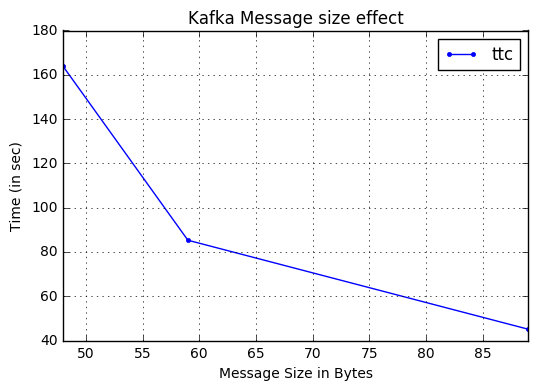

In [111]:
ax = bigdata.plot(y=['ttc'], x=['Message_Size_in_Bytes'], 
                      title='Kafka Message size effect', 
                      #legend=None,
                      marker='.',
                      #yerr= plot_std.unstack(),
                      )
#ax.set_xscale('log', basex=2)
#pyplot.xscale('log')
#ax.set_yscale('log',basey=2)
ax.set_xlabel("Message Size in Bytes")
ax.set_ylabel("Time (in sec)")
ax.grid()
plt.show()

**The bigger the message size,the better the throughput of the system**

### #4 Experiment - Producer throughput vs number of partitions
Expectation. More partitions lead to higher throughput
#### Experimental setup:
System: wrangler <br>
Nodes: 1 <br>
Brokers : 1  <br>
Kafka producers : 1 <br>
Partitions: 1 <br>
Total Messages Size: Vary <br>


### #5 Experiment - Producer throughput vs number of partitions
Same experiment using multiple producers this time
#### Experimental setup:
System: wrangler <br>
Nodes: Varying <br>
Brokers : Varying  <br>
Kafka producers : Varying <br>
Partitions: 1 <br>
Total Messages Size: Vary <br>


### #6 Experiment - Consumer throughput vs number of partitions
Measure  the consumer total time to completion. How fast is the consumer reading the messages?

#### Experimental setup:
System: wrangler <br>
Nodes: 1 <br>
Brokers : 1  <br>
Kafka producers : 1 <br>
Kafka consumers : 1
Partitions: 1 <br>
Total Messages Size: Vary <br>

### #7 Experiment - Consumer throughput vs number of partitions
Measure  the consumer's total time to completion. How fast is the consumer reading the messages? 
In this experiment we measure how fast a kafka consumer is reading messages that have already been produced by a producer.

#### Experimental setup:
System: wrangler <br>
Nodes: 1 <br>
Brokers : 1  <br>
Kafka consumers : 1 <br>
Partitions: 1 <br>
Total Messages Size: Vary <br>

### Daybook

In [157]:
test_data = pd.read_csv('kafka_producer_throughput_size_20.csv', skipinitialspace=True) #89 bytes
test_data

,Nodes,Number_of_points,Number_of_partitions,ttc,system
0,1,1000000,16,439.959164,wrangler
1,1,1000000,16,431.650054,wrangler
2,1,1000000,64,473.713585,wrangler
3,1,1000000,90,447.717588,wrangler
4,1,3000000,120,1239.627581,wrangler
5,1,3000000,90,1255.802454,wrangler
6,1,1000000,90,417.272083,wrangler
7,1,3000000,90,1231.633964,wrangler
8,1,100000,1,45.103489,stampede
9,1,100000,4,45.981632,stampede


I increase the number of partitions but there is still no speedup trend to my producer experiments. <b>
A possible explanation is because  I stress the producer so much that fails to speedup. <br>
Therefore, I decided to add a time interval of 0.02 seconds to see if the trend continues.  <br>


In [164]:
sleep_data = pd.read_csv('kafka_producer_throughput_sleep.csv', skipinitialspace=True) #89 bytes
sleep_data

,Nodes,Number_of_points,Number_of_partitions,ttc,system,sleep_time
0,1,100000,1,520.144978,stampede,0.02
1,1,100000,8,495.545048,stampede,0.02
2,1,100000,16,497.390657,stampede,0.02
3,1,100000,4,513.354598,stampede,0.02
